In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Data Preprocessing

In [2]:
df = pd.read_csv("mlbootcamp5_train.csv")
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [3]:
# convert days to years for age
df.age = round(df.age / 365)
df.age = df.age.astype(int)
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,50,2,168,62.0,110,80,1,1,0,0,1,0
1,1,55,1,156,85.0,140,90,3,1,0,0,1,1
2,2,52,1,165,64.0,130,70,3,1,0,0,0,1
3,3,48,2,169,82.0,150,100,1,1,0,0,1,1
4,4,48,1,156,56.0,100,60,1,1,0,0,0,0


In [4]:
# check missing data
print (df.isnull().sum(axis = 0))

# check unreliable data
print ("ap_hi below 50:", len(df[df['ap_hi'] <= 50]) , ", ap_hi above 210:", len(df[df['ap_hi'] >= 210]))
print ("ap_lo below 20:", len(df[df['ap_lo'] <= 20]) , ", ap_lo above 120:", len(df[df['ap_lo'] >= 120]))

# Replace unreliable data
# For Systolic blood pressure (ap_hi), set everything below 50 and above 200 to the mean

df = df[df.ap_hi > 50]
df = df[df.ap_hi < 210]
df = df[df.ap_lo > 20]
df = df[df.ap_lo < 120] 

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64
ap_hi below 50: 188 , ap_hi above 210: 98
ap_lo below 20: 53 , ap_lo above 120: 1263


In [5]:
# Use onehotencoder to split the variable Cholesterol and Glucose level
from sklearn.preprocessing import OneHotEncoder
onehotencoder = OneHotEncoder(dtype = int)
a = onehotencoder.fit_transform(df.iloc[:, 7].values.reshape(-1,1)).toarray()
b = onehotencoder.fit_transform(df.iloc[:, 8].values.reshape(-1,1)).toarray()

temp = df.cardio
df = df.drop(["cholesterol","gluc","cardio"],axis = 1)

df["normal Cholesterol level"] = a[:,0]
df["above normal Cholesterol level"] = a[:,1]
df["well above normal Cholesterol level"] = a[:,2]
df["normal Glucose level"] = b[:,0]
df["above normal Glucose level"] = b[:,1]
df["well above normal Glucose level"] = b[:,2]
df["cardio"] = temp
df.head()


,id,age,gender,height,weight,ap_hi,ap_lo,smoke,alco,active,normal Cholesterol level,above normal Cholesterol level,well above normal Cholesterol level,normal Glucose level,above normal Glucose level,well above normal Glucose level,cardio
0,0,50,2,168,62.0,110,80,0,0,1,1,0,0,1,0,0,0
1,1,55,1,156,85.0,140,90,0,0,1,0,0,1,1,0,0,1
2,2,52,1,165,64.0,130,70,0,0,0,0,0,1,1,0,0,1
3,3,48,2,169,82.0,150,100,0,0,1,1,0,0,1,0,0,1
4,4,48,1,156,56.0,100,60,0,0,0,1,0,0,1,0,0,0


In [6]:
# Since the dataset does not specify the gender, we will deduct the gender code by comparing the avergae heights
# Making assumptions that men are taller than women in general
# And convert the code 0 for men and 1 for women
index1 = np.where(df.iloc[:,2] == 1)[0]
index2 = np.where(df.iloc[:,2] == 2)[0]
print (np.mean(df.iloc[:,3].values[index1]))
print (np.mean(df.iloc[:,3].values[index2]))

df.gender = df.gender.apply(lambda x: 0 if x == 2 else 1)
df.head()

161.379940368
169.937893148


,id,age,gender,height,weight,ap_hi,ap_lo,smoke,alco,active,normal Cholesterol level,above normal Cholesterol level,well above normal Cholesterol level,normal Glucose level,above normal Glucose level,well above normal Glucose level,cardio
0,0,50,0,168,62.0,110,80,0,0,1,1,0,0,1,0,0,0
1,1,55,1,156,85.0,140,90,0,0,1,0,0,1,1,0,0,1
2,2,52,1,165,64.0,130,70,0,0,0,0,0,1,1,0,0,1
3,3,48,0,169,82.0,150,100,0,0,1,1,0,0,1,0,0,1
4,4,48,1,156,56.0,100,60,0,0,0,1,0,0,1,0,0,0


# Data Analysis

In [7]:
df=df.drop('id', axis=1)

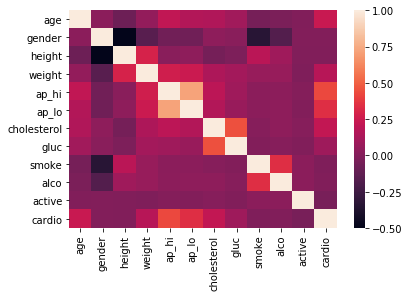

In [8]:
import seaborn as sns
%matplotlib inline

# calculate the correlation matrix
corr = df.corr()

# plot the heatmap
heatmap_plot = sns.heatmap(corr, 
               xticklabels=corr.columns,
               yticklabels=corr.columns)


In [9]:
heatmap_plot.get_figure().savefig("heatmap_plot.png")

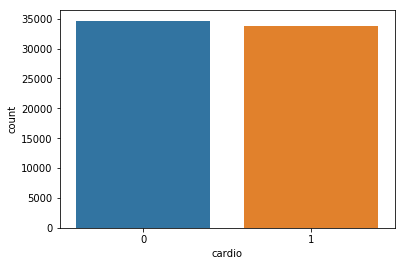

In [10]:
balance_plot = sns.countplot(x="cardio", data=df)
balance_plot.get_figure().savefig("balance_plot.png")

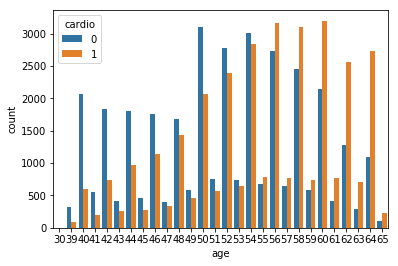

In [53]:
dist_cardio = sns.countplot(x="age",hue="cardio",data=df);
dist_cardio.get_figure().savefig("dist_cardio_plot.png")

In [68]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()

# Model Buidling

In [8]:
X = df.loc[:,"age":"well above normal Glucose level"]
y = df['cardio']

In [9]:
import numpy as np
np.random.seed(10)

import matplotlib.pyplot as plt

from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import (RandomTreesEmbedding, RandomForestClassifier,
                              GradientBoostingClassifier)
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.pipeline import make_pipeline

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7)

# Random Forest

In [93]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 3000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [95]:
# Supervised transformation based on random forests
rf_clf = RandomForestClassifier()
rf_random = RandomizedSearchCV(estimator = rf_clf, 
                               param_distributions = random_grid, 
                               n_iter = 100, 
                               cv = 3, 
                               verbose=2, 
                               random_state=42, 
                               n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV] min_samples_split=5, min_samples_leaf=1, max_features=sqrt, n_estimators=511, max_depth=30, bootstrap=True 
[CV] min_samples_split=5, min_samples_leaf=1, max_features=sqrt, n_estimators=511, max_depth=30, bootstrap=True 
[CV] min_samples_split=5, min_samples_leaf=1, max_features=sqrt, n_estimators=511, max_depth=30, bootstrap=True 
[CV] min_samples_split=5, min_samples_leaf=1, max_features=sqrt, n_estimators=3000, max_depth=10, bootstrap=True 
[CV] min_samples_split=5, min_samples_leaf=1, max_features=sqrt, n_estimators=3000, max_depth=10, bootstrap=True 
[CV] min_samples_split=5, min_samples_leaf=1, max_features=sqrt, n_estimators=3000, max_depth=10, bootstrap=True 
[CV] min_samples_split=5, min_samples_leaf=2, max_features=sqrt, n_estimators=1755, max_depth=10, bootstrap=False 
[CV] min_samples_split=5, min_samples_leaf=2, max_features=sqrt, n_estimators=1755, max_depth=10, bootstrap=False 
[CV]  min_samples_split=5,

[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  2.6min


[CV]  min_samples_split=10, min_samples_leaf=4, max_features=auto, n_estimators=511, max_depth=70, bootstrap=True, total=   9.4s
[CV] min_samples_split=5, min_samples_leaf=1, max_features=sqrt, n_estimators=1133, max_depth=90, bootstrap=False 
[CV]  min_samples_split=10, min_samples_leaf=4, max_features=auto, n_estimators=511, max_depth=70, bootstrap=True, total=   9.4s
[CV] min_samples_split=5, min_samples_leaf=1, max_features=sqrt, n_estimators=1133, max_depth=90, bootstrap=False 
[CV]  min_samples_split=2, min_samples_leaf=1, max_features=auto, n_estimators=1444, max_depth=50, bootstrap=False, total=  57.9s
[CV] min_samples_split=5, min_samples_leaf=1, max_features=sqrt, n_estimators=1133, max_depth=90, bootstrap=False 
[CV]  min_samples_split=2, min_samples_leaf=1, max_features=auto, n_estimators=1444, max_depth=50, bootstrap=False, total=  59.7s
[CV] min_samples_split=10, min_samples_leaf=1, max_features=sqrt, n_estimators=3000, max_depth=10, bootstrap=False 
[CV]  min_samples_spl

[CV] min_samples_split=5, min_samples_leaf=4, max_features=sqrt, n_estimators=2066, max_depth=80, bootstrap=True 
[CV]  min_samples_split=10, min_samples_leaf=2, max_features=auto, n_estimators=2688, max_depth=110, bootstrap=False, total= 1.2min
[CV] min_samples_split=5, min_samples_leaf=4, max_features=sqrt, n_estimators=2066, max_depth=80, bootstrap=True 
[CV]  min_samples_split=5, min_samples_leaf=4, max_features=sqrt, n_estimators=2066, max_depth=80, bootstrap=True, total=  39.7s
[CV] min_samples_split=5, min_samples_leaf=4, max_features=sqrt, n_estimators=2066, max_depth=80, bootstrap=True 
[CV]  min_samples_split=10, min_samples_leaf=1, max_features=sqrt, n_estimators=2688, max_depth=30, bootstrap=False, total= 1.4min
[CV] min_samples_split=2, min_samples_leaf=2, max_features=auto, n_estimators=2688, max_depth=None, bootstrap=True 
[CV]  min_samples_split=10, min_samples_leaf=1, max_features=sqrt, n_estimators=2688, max_depth=30, bootstrap=False, total= 1.4min
[CV] min_samples_sp

[CV]  min_samples_split=10, min_samples_leaf=4, max_features=sqrt, n_estimators=1755, max_depth=20, bootstrap=False, total=  47.9s
[CV] min_samples_split=10, min_samples_leaf=4, max_features=sqrt, n_estimators=1133, max_depth=50, bootstrap=True 
[CV]  min_samples_split=2, min_samples_leaf=2, max_features=sqrt, n_estimators=1133, max_depth=50, bootstrap=False, total=  40.4s
[CV] min_samples_split=10, min_samples_leaf=4, max_features=sqrt, n_estimators=1133, max_depth=50, bootstrap=True 
[CV]  min_samples_split=2, min_samples_leaf=2, max_features=sqrt, n_estimators=1133, max_depth=50, bootstrap=False, total=  40.6s
[CV] min_samples_split=2, min_samples_leaf=4, max_features=sqrt, n_estimators=2688, max_depth=90, bootstrap=True 
[CV]  min_samples_split=2, min_samples_leaf=2, max_features=sqrt, n_estimators=1133, max_depth=50, bootstrap=False, total=  41.1s
[CV] min_samples_split=2, min_samples_leaf=4, max_features=sqrt, n_estimators=2688, max_depth=90, bootstrap=True 
[CV]  min_samples_spl

[CV]  min_samples_split=2, min_samples_leaf=4, max_features=sqrt, n_estimators=1133, max_depth=90, bootstrap=True, total=  24.1s
[CV] min_samples_split=5, min_samples_leaf=2, max_features=auto, n_estimators=200, max_depth=90, bootstrap=False 
[CV]  min_samples_split=10, min_samples_leaf=4, max_features=sqrt, n_estimators=511, max_depth=90, bootstrap=True, total=  10.5s
[CV] min_samples_split=2, min_samples_leaf=1, max_features=sqrt, n_estimators=1444, max_depth=110, bootstrap=True 
[CV]  min_samples_split=10, min_samples_leaf=4, max_features=sqrt, n_estimators=511, max_depth=90, bootstrap=True, total=  10.5s
[CV] min_samples_split=2, min_samples_leaf=1, max_features=sqrt, n_estimators=1444, max_depth=110, bootstrap=True 
[CV]  min_samples_split=10, min_samples_leaf=4, max_features=sqrt, n_estimators=511, max_depth=90, bootstrap=True, total=  10.7s
[CV] min_samples_split=2, min_samples_leaf=1, max_features=sqrt, n_estimators=1444, max_depth=110, bootstrap=True 
[CV]  min_samples_split=2

[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed: 16.1min


[CV] min_samples_split=10, min_samples_leaf=2, max_features=auto, n_estimators=3000, max_depth=50, bootstrap=False 
[CV]  min_samples_split=2, min_samples_leaf=2, max_features=auto, n_estimators=3000, max_depth=90, bootstrap=True, total= 1.4min
[CV] min_samples_split=10, min_samples_leaf=2, max_features=auto, n_estimators=3000, max_depth=50, bootstrap=False 
[CV]  min_samples_split=2, min_samples_leaf=2, max_features=auto, n_estimators=3000, max_depth=90, bootstrap=True, total= 1.4min
[CV] min_samples_split=10, min_samples_leaf=2, max_features=auto, n_estimators=3000, max_depth=50, bootstrap=False 
[CV]  min_samples_split=2, min_samples_leaf=2, max_features=sqrt, n_estimators=822, max_depth=110, bootstrap=False, total=  28.2s
[CV] min_samples_split=10, min_samples_leaf=4, max_features=auto, n_estimators=1444, max_depth=50, bootstrap=False 
[CV]  min_samples_split=2, min_samples_leaf=4, max_features=sqrt, n_estimators=1755, max_depth=70, bootstrap=False, total=  53.3s
[CV] min_samples_s

[CV] min_samples_split=10, min_samples_leaf=4, max_features=auto, n_estimators=1444, max_depth=80, bootstrap=False 
[CV]  min_samples_split=2, min_samples_leaf=4, max_features=sqrt, n_estimators=511, max_depth=10, bootstrap=True, total=   7.9s
[CV] min_samples_split=10, min_samples_leaf=4, max_features=auto, n_estimators=1444, max_depth=80, bootstrap=False 
[CV]  min_samples_split=2, min_samples_leaf=1, max_features=auto, n_estimators=2066, max_depth=100, bootstrap=True, total= 1.2min
[CV] min_samples_split=10, min_samples_leaf=2, max_features=auto, n_estimators=1755, max_depth=None, bootstrap=False 
[CV]  min_samples_split=2, min_samples_leaf=2, max_features=auto, n_estimators=2688, max_depth=80, bootstrap=True, total= 1.2min
[CV] min_samples_split=10, min_samples_leaf=2, max_features=auto, n_estimators=1755, max_depth=None, bootstrap=False 
[CV]  min_samples_split=2, min_samples_leaf=1, max_features=auto, n_estimators=2066, max_depth=100, bootstrap=True, total= 1.2min
[CV]  min_sampl

[CV]  min_samples_split=10, min_samples_leaf=2, max_features=auto, n_estimators=3000, max_depth=60, bootstrap=False, total= 1.5min
[CV] min_samples_split=5, min_samples_leaf=1, max_features=auto, n_estimators=511, max_depth=90, bootstrap=False 
[CV]  min_samples_split=2, min_samples_leaf=4, max_features=sqrt, n_estimators=1133, max_depth=20, bootstrap=False, total=  30.6s
[CV] min_samples_split=5, min_samples_leaf=1, max_features=auto, n_estimators=2377, max_depth=90, bootstrap=True 
[CV]  min_samples_split=5, min_samples_leaf=1, max_features=auto, n_estimators=511, max_depth=90, bootstrap=False, total=  20.8s
[CV] min_samples_split=5, min_samples_leaf=1, max_features=auto, n_estimators=2377, max_depth=90, bootstrap=True 
[CV]  min_samples_split=5, min_samples_leaf=1, max_features=auto, n_estimators=511, max_depth=90, bootstrap=False, total=  20.2s
[CV] min_samples_split=5, min_samples_leaf=1, max_features=auto, n_estimators=2377, max_depth=90, bootstrap=True 
[CV]  min_samples_split=1

[CV] min_samples_split=5, min_samples_leaf=4, max_features=sqrt, n_estimators=1133, max_depth=70, bootstrap=False 
[CV]  min_samples_split=2, min_samples_leaf=4, max_features=auto, n_estimators=3000, max_depth=60, bootstrap=False, total= 1.2min
[CV] min_samples_split=10, min_samples_leaf=1, max_features=sqrt, n_estimators=822, max_depth=40, bootstrap=False 
[CV]  min_samples_split=2, min_samples_leaf=4, max_features=auto, n_estimators=3000, max_depth=60, bootstrap=False, total= 1.3min
[CV] min_samples_split=10, min_samples_leaf=1, max_features=sqrt, n_estimators=822, max_depth=40, bootstrap=False 
[CV]  min_samples_split=2, min_samples_leaf=4, max_features=auto, n_estimators=3000, max_depth=60, bootstrap=False, total= 1.2min
[CV] min_samples_split=10, min_samples_leaf=1, max_features=sqrt, n_estimators=822, max_depth=40, bootstrap=False 
[CV]  min_samples_split=10, min_samples_leaf=2, max_features=auto, n_estimators=1133, max_depth=None, bootstrap=False, total=  29.6s
[CV] min_samples_

[CV] min_samples_split=2, min_samples_leaf=1, max_features=auto, n_estimators=1444, max_depth=10, bootstrap=False 
[CV]  min_samples_split=10, min_samples_leaf=2, max_features=auto, n_estimators=511, max_depth=40, bootstrap=False, total=  13.7s
[CV] min_samples_split=2, min_samples_leaf=1, max_features=auto, n_estimators=1444, max_depth=10, bootstrap=False 
[CV]  min_samples_split=2, min_samples_leaf=4, max_features=sqrt, n_estimators=822, max_depth=30, bootstrap=False, total=  19.8s
[CV] min_samples_split=2, min_samples_leaf=1, max_features=auto, n_estimators=1444, max_depth=10, bootstrap=False 
[CV]  min_samples_split=2, min_samples_leaf=4, max_features=sqrt, n_estimators=822, max_depth=30, bootstrap=False, total=  19.8s
[CV] min_samples_split=5, min_samples_leaf=4, max_features=auto, n_estimators=200, max_depth=100, bootstrap=False 
[CV]  min_samples_split=10, min_samples_leaf=2, max_features=auto, n_estimators=511, max_depth=40, bootstrap=False, total=  13.6s
[CV] min_samples_split

[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 31.5min finished


RandomizedSearchCV(cv=3, error_score='raise',
          estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
          fit_params=None, iid=True, n_iter=100, n_jobs=-1,
          param_distributions={'min_samples_split': [2, 5, 10], 'max_features': ['auto', 'sqrt'], 'min_samples_leaf': [1, 2, 4], 'n_estimators': [200, 511, 822, 1133, 1444, 1755, 2066, 2377, 2688, 3000], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'bootstrap': [True, False]},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score='warn', scoring=None, verbose=2)

In [96]:
rf_random.best_params_

{'bootstrap': True,
 'max_depth': 10,
 'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'min_samples_split': 10,
 'n_estimators': 1444}

In [18]:
from sklearn.metrics import accuracy_score
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    accuracy = accuracy_score(predictions, test_labels)
    print('Model Performance')
    print('Accuracy %.4f'% accuracy)
    return round(accuracy,4)

In [125]:
base_rf_model = RandomForestClassifier(n_estimators = 10)
base_rf_model.fit(X_train, y_train)
base_rf_accuracy = evaluate(base_rf_model, X_test, y_test)

Model Performance
Accuracy 0.69


In [32]:
best_rf = RandomForestClassifier(max_depth=10, 
                                 max_features='sqrt',
                                 min_samples_leaf=2,
                                 min_samples_split=10,
                                 n_estimators = 1444)
#best_rf_accuracy = evaluate(best_rf, X_test, y_test)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=10, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=2, min_samples_split=10,
            min_weight_fraction_leaf=0.0, n_estimators=1444, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [34]:
%timeit best_rf.fit(X_train, y_train)

13.7 s ± 122 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [119]:
print('Improvement of {:0.2f}%.'.format( 100 * (best_rf_accuracy - base_rf_accuracy) / base_rf_accuracy))

Improvement of 5.80%.


In [37]:
rf_pred = best_rf.predict_proba(X_test)[:,1]
fpr_rf, tpr_rf, _ = roc_curve(y_test, rf_pred)

In [62]:
X.shape[1]

15

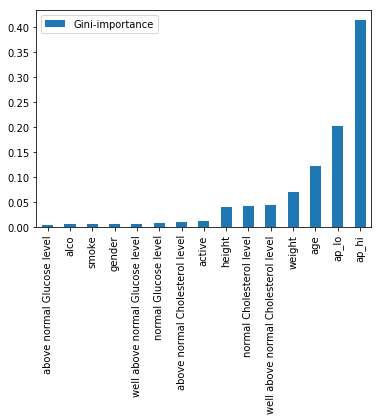

In [69]:
%matplotlib inline
feats = {} # a dict to hold feature_name: feature_importance
for feature, importance in zip(X.columns, best_rf.feature_importances_):
    feats[feature] = importance #add the name/value pair 

importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Gini-importance'})
importance_plot = importances.sort_values(by='Gini-importance').plot(kind='bar')

In [70]:
importance_plot.get_figure().savefig("importance_plot.png")

In [91]:
evaluate(best_rf, X_test, y_test)

Model Performance
Accuracy 0.73


0.72999999999999998

# GDBT

In [71]:
# Number of trees in random forest
n_estimators = [100, 1000,1500,2000,2500,3000,3500,4000]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4, 6]
# Learning rate
learning_rate = [1, 0.5, 0.25, 0.1, 0.05, 0.01]
# Create the random grid
gbdt_random_grid = {'n_estimators': n_estimators,
                    'max_features': max_features,
                    'max_depth': max_depth,
                    'min_samples_split': min_samples_split,
                    'min_samples_leaf': min_samples_leaf,
                    'learning_rate': learning_rate}

SyntaxError: invalid syntax (<ipython-input-41-d239a159914d>, line 1)

In [72]:
gbdt_clf = GradientBoostingClassifier()
gbdt_random = RandomizedSearchCV(estimator = gbdt_clf, 
                               param_distributions = gbdt_random_grid, 
                               n_iter = 100, 
                               cv = 3, 
                               verbose=2, 
                               random_state=42, 
                               n_jobs = -1)
# Fit the random search model
gbdt_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV] max_features=sqrt, min_samples_split=10, n_estimators=2000, learning_rate=0.01, max_depth=20, min_samples_leaf=2 
[CV] max_features=sqrt, min_samples_split=10, n_estimators=2000, learning_rate=0.01, max_depth=20, min_samples_leaf=2 
[CV] max_features=sqrt, min_samples_split=10, n_estimators=2000, learning_rate=0.01, max_depth=20, min_samples_leaf=2 
[CV] max_features=auto, min_samples_split=15, n_estimators=2500, learning_rate=1, max_depth=40, min_samples_leaf=4 
[CV] max_features=auto, min_samples_split=15, n_estimators=2500, learning_rate=1, max_depth=40, min_samples_leaf=4 
[CV] max_features=auto, min_samples_split=15, n_estimators=2500, learning_rate=1, max_depth=40, min_samples_leaf=4 
[CV] max_features=auto, min_samples_split=5, n_estimators=3500, learning_rate=0.5, max_depth=100, min_samples_leaf=1 
[CV] max_features=auto, min_samples_split=5, n_estimators=3500, learning_rate=0.5, max_depth=100, min_samples_leaf

[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed: 40.2min


[CV]  max_features=auto, min_samples_split=2, n_estimators=2000, learning_rate=0.1, max_depth=90, min_samples_leaf=6, total=14.9min
[CV] max_features=sqrt, min_samples_split=2, n_estimators=1500, learning_rate=0.25, max_depth=90, min_samples_leaf=1 
[CV]  max_features=auto, min_samples_split=2, n_estimators=2000, learning_rate=0.1, max_depth=90, min_samples_leaf=6, total=13.5min
[CV] max_features=sqrt, min_samples_split=2, n_estimators=1500, learning_rate=0.25, max_depth=90, min_samples_leaf=1 
[CV]  max_features=sqrt, min_samples_split=2, n_estimators=1500, learning_rate=0.25, max_depth=90, min_samples_leaf=1, total= 4.1min
[CV] max_features=sqrt, min_samples_split=2, n_estimators=1500, learning_rate=0.25, max_depth=90, min_samples_leaf=1 
[CV]  max_features=sqrt, min_samples_split=2, n_estimators=1500, learning_rate=0.25, max_depth=90, min_samples_leaf=1, total= 4.4min
[CV] max_features=sqrt, min_samples_split=10, n_estimators=3000, learning_rate=1, max_depth=70, min_samples_leaf=1 


[CV]  max_features=sqrt, min_samples_split=15, n_estimators=1500, learning_rate=0.25, max_depth=100, min_samples_leaf=4, total= 2.1min
[CV] max_features=sqrt, min_samples_split=15, n_estimators=2000, learning_rate=1, max_depth=110, min_samples_leaf=2 
[CV]  max_features=auto, min_samples_split=10, n_estimators=2500, learning_rate=0.25, max_depth=20, min_samples_leaf=1, total= 6.5min
[CV] max_features=sqrt, min_samples_split=15, n_estimators=2000, learning_rate=1, max_depth=110, min_samples_leaf=2 
[CV]  max_features=sqrt, min_samples_split=15, n_estimators=1500, learning_rate=0.25, max_depth=100, min_samples_leaf=4, total= 1.9min
[CV] max_features=sqrt, min_samples_split=15, n_estimators=2000, learning_rate=1, max_depth=110, min_samples_leaf=2 
[CV]  max_features=auto, min_samples_split=10, n_estimators=2500, learning_rate=0.25, max_depth=20, min_samples_leaf=1, total= 6.1min
[CV] max_features=sqrt, min_samples_split=15, n_estimators=3000, learning_rate=1, max_depth=10, min_samples_lea

[CV]  max_features=auto, min_samples_split=10, n_estimators=1500, learning_rate=0.5, max_depth=40, min_samples_leaf=2, total= 6.0min
[CV] max_features=sqrt, min_samples_split=2, n_estimators=2000, learning_rate=0.1, max_depth=60, min_samples_leaf=1 
[CV]  max_features=auto, min_samples_split=10, n_estimators=1500, learning_rate=0.5, max_depth=40, min_samples_leaf=2, total= 7.2min
[CV] max_features=sqrt, min_samples_split=2, n_estimators=2000, learning_rate=0.1, max_depth=60, min_samples_leaf=1 
[CV]  max_features=sqrt, min_samples_split=2, n_estimators=3500, learning_rate=0.25, max_depth=110, min_samples_leaf=1, total= 8.7min
[CV] max_features=sqrt, min_samples_split=2, n_estimators=2000, learning_rate=0.1, max_depth=60, min_samples_leaf=1 
[CV]  max_features=sqrt, min_samples_split=2, n_estimators=3500, learning_rate=0.25, max_depth=110, min_samples_leaf=1, total= 8.1min
[CV] max_features=auto, min_samples_split=15, n_estimators=100, learning_rate=0.25, max_depth=110, min_samples_leaf

[CV]  max_features=sqrt, min_samples_split=5, n_estimators=2000, learning_rate=0.01, max_depth=20, min_samples_leaf=2, total=12.1min
[CV] max_features=auto, min_samples_split=2, n_estimators=1500, learning_rate=0.25, max_depth=90, min_samples_leaf=2 
[CV]  max_features=sqrt, min_samples_split=5, n_estimators=3500, learning_rate=0.1, max_depth=None, min_samples_leaf=2, total= 6.3min
[CV] max_features=auto, min_samples_split=2, n_estimators=1500, learning_rate=0.25, max_depth=90, min_samples_leaf=2 
[CV]  max_features=sqrt, min_samples_split=5, n_estimators=2000, learning_rate=0.01, max_depth=20, min_samples_leaf=2, total=11.9min
[CV] max_features=auto, min_samples_split=2, n_estimators=1500, learning_rate=0.25, max_depth=90, min_samples_leaf=2 
[CV]  max_features=sqrt, min_samples_split=5, n_estimators=3500, learning_rate=0.1, max_depth=None, min_samples_leaf=2, total= 6.7min
[CV] max_features=sqrt, min_samples_split=5, n_estimators=3000, learning_rate=0.05, max_depth=90, min_samples_le

[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed: 139.9min


[CV] max_features=auto, min_samples_split=10, n_estimators=3000, learning_rate=0.1, max_depth=70, min_samples_leaf=2 
[CV]  max_features=sqrt, min_samples_split=2, n_estimators=3000, learning_rate=0.1, max_depth=100, min_samples_leaf=1, total= 8.4min
[CV] max_features=auto, min_samples_split=10, n_estimators=3000, learning_rate=0.1, max_depth=70, min_samples_leaf=2 
[CV]  max_features=auto, min_samples_split=2, n_estimators=4000, learning_rate=0.01, max_depth=80, min_samples_leaf=1, total=32.8min
[CV] max_features=auto, min_samples_split=10, n_estimators=3000, learning_rate=0.1, max_depth=70, min_samples_leaf=2 
[CV]  max_features=auto, min_samples_split=2, n_estimators=4000, learning_rate=0.5, max_depth=40, min_samples_leaf=6, total=15.0min
[CV] max_features=auto, min_samples_split=5, n_estimators=1000, learning_rate=0.05, max_depth=50, min_samples_leaf=6 
[CV]  max_features=auto, min_samples_split=2, n_estimators=4000, learning_rate=0.5, max_depth=40, min_samples_leaf=6, total=13.5mi

[CV] max_features=sqrt, min_samples_split=5, n_estimators=3000, learning_rate=0.25, max_depth=60, min_samples_leaf=4 
[CV]  max_features=sqrt, min_samples_split=2, n_estimators=2000, learning_rate=1, max_depth=40, min_samples_leaf=6, total= 2.0min
[CV] max_features=sqrt, min_samples_split=5, n_estimators=3000, learning_rate=0.25, max_depth=60, min_samples_leaf=4 
[CV]  max_features=sqrt, min_samples_split=5, n_estimators=3000, learning_rate=0.25, max_depth=60, min_samples_leaf=4, total= 3.8min
[CV] max_features=sqrt, min_samples_split=5, n_estimators=3000, learning_rate=0.25, max_depth=60, min_samples_leaf=4 
[CV]  max_features=auto, min_samples_split=5, n_estimators=2000, learning_rate=0.5, max_depth=110, min_samples_leaf=2, total= 9.5min
[CV] max_features=sqrt, min_samples_split=15, n_estimators=100, learning_rate=1, max_depth=40, min_samples_leaf=6 
[CV]  max_features=sqrt, min_samples_split=15, n_estimators=100, learning_rate=1, max_depth=40, min_samples_leaf=6, total=  13.9s
[CV] 

[CV] max_features=auto, min_samples_split=15, n_estimators=100, learning_rate=0.01, max_depth=40, min_samples_leaf=4 
[CV]  max_features=auto, min_samples_split=15, n_estimators=2000, learning_rate=0.25, max_depth=100, min_samples_leaf=6, total= 9.1min
[CV] max_features=auto, min_samples_split=15, n_estimators=100, learning_rate=0.01, max_depth=40, min_samples_leaf=4 
[CV]  max_features=auto, min_samples_split=2, n_estimators=100, learning_rate=0.01, max_depth=50, min_samples_leaf=4, total= 1.6min
[CV] max_features=auto, min_samples_split=15, n_estimators=100, learning_rate=0.01, max_depth=40, min_samples_leaf=4 
[CV]  max_features=auto, min_samples_split=2, n_estimators=100, learning_rate=0.01, max_depth=50, min_samples_leaf=4, total= 1.6min
[CV] max_features=auto, min_samples_split=2, n_estimators=3500, learning_rate=0.25, max_depth=80, min_samples_leaf=4 
[CV]  max_features=auto, min_samples_split=15, n_estimators=100, learning_rate=0.01, max_depth=40, min_samples_leaf=4, total= 1.1

[CV] max_features=auto, min_samples_split=2, n_estimators=2500, learning_rate=0.5, max_depth=None, min_samples_leaf=1 
[CV]  max_features=sqrt, min_samples_split=2, n_estimators=1500, learning_rate=0.05, max_depth=70, min_samples_leaf=2, total= 5.2min
[CV] max_features=auto, min_samples_split=2, n_estimators=2500, learning_rate=0.5, max_depth=None, min_samples_leaf=1 
[CV]  max_features=sqrt, min_samples_split=2, n_estimators=4000, learning_rate=1, max_depth=20, min_samples_leaf=1, total= 5.5min
[CV] max_features=auto, min_samples_split=2, n_estimators=2500, learning_rate=0.5, max_depth=None, min_samples_leaf=1 
[CV]  max_features=sqrt, min_samples_split=2, n_estimators=1500, learning_rate=0.05, max_depth=70, min_samples_leaf=2, total= 5.1min
[CV] max_features=sqrt, min_samples_split=5, n_estimators=1000, learning_rate=0.5, max_depth=20, min_samples_leaf=6 
[CV]  max_features=sqrt, min_samples_split=2, n_estimators=1500, learning_rate=0.05, max_depth=70, min_samples_leaf=2, total= 5.4m

[CV] max_features=sqrt, min_samples_split=2, n_estimators=100, learning_rate=0.5, max_depth=80, min_samples_leaf=4 
[CV]  max_features=sqrt, min_samples_split=2, n_estimators=100, learning_rate=0.5, max_depth=80, min_samples_leaf=4, total=  22.8s
[CV] max_features=sqrt, min_samples_split=2, n_estimators=100, learning_rate=0.5, max_depth=80, min_samples_leaf=4 
[CV]  max_features=sqrt, min_samples_split=2, n_estimators=100, learning_rate=0.5, max_depth=80, min_samples_leaf=4, total=  23.0s
[CV] max_features=sqrt, min_samples_split=2, n_estimators=100, learning_rate=0.5, max_depth=80, min_samples_leaf=4 
[CV]  max_features=sqrt, min_samples_split=2, n_estimators=100, learning_rate=0.5, max_depth=80, min_samples_leaf=4, total=  22.8s
[CV] max_features=auto, min_samples_split=2, n_estimators=2500, learning_rate=0.05, max_depth=110, min_samples_leaf=6 
[CV]  max_features=sqrt, min_samples_split=10, n_estimators=3000, learning_rate=0.1, max_depth=70, min_samples_leaf=4, total= 4.6min
[CV] ma

[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 276.3min finished


RandomizedSearchCV(cv=3, error_score='raise',
          estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False),
          fit_params=None, iid=True, n_iter=100, n_jobs=-1,
          param_distributions={'max_features': ['auto', 'sqrt'], 'min_samples_split': [2, 5, 10, 15], 'n_estimators': [100, 1000, 1500, 2000, 2500, 3000, 3500, 4000], 'learning_rate': [1, 0.5, 0.25, 0.1, 0.05, 0.01], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_leaf': [1, 2, 4, 6]},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_tr

In [73]:
gbdt_random.best_params_

{'learning_rate': 0.01,
 'max_depth': 100,
 'max_features': 'sqrt',
 'min_samples_leaf': 6,
 'min_samples_split': 15,
 'n_estimators': 100}

In [74]:
best_gbdt = gbdt_random.best_estimator_
evaluate(best_gbdt, X_test, y_test)

Model Performance
Accuracy 0.73


0.72999999999999998

In [75]:
gbdt_pred = best_gbdt.predict_proba(X_test)[:,1]
fpr_gbdt, tpr_gbdt, _ = roc_curve(y_test, gbdt_pred)

# KNN 

In [42]:
from sklearn.neighbors import KNeighborsClassifier


[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]

In [51]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

pipe = make_pipeline(StandardScaler(), KNeighborsClassifier())


param_grid=[
    {
        'n_neighbors':[i for i in range(1,20)]
    }]

knn_gs = GridSearchCV(KNeighborsClassifier(),
                   param_grid=param_grid, 
                   iid=False,
                   n_jobs=-1,
                   refit=True,
                   scoring='accuracy',
                   cv=10)

knn_gs.fit(X_train, y_train)

GridSearchCV(cv=10, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid=False, n_jobs=-1,
       param_grid=[{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [52]:
print('Best Accuracy: %.2f%%' % (knn_gs.best_score_*100))
from sklearn.metrics import accuracy_score
print('Best Params: %s' % knn_gs.best_params_)
print('Test Accuracy: %.2f%%' % accuracy_score(knn_gs.predict(X_test), y_test))

Best Accuracy: 71.48%
Best Params: {'n_neighbors': 18}
Test Accuracy: 0.71%


In [53]:
knn_pred = knn_gs.best_estimator_.predict_proba(X_test)[:,1]
fpr_knn, tpr_knn, _ = roc_curve(y_test, knn_pred)

# Decision Tree

In [22]:
from sklearn.model_selection import RandomizedSearchCV
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(1, 300, num = 10)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10,15]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4, 6, 8]
# Create the random grid
dt_random_grid = {'max_features': max_features,
                   'max_depth': max_depth,
                   'min_samples_split': min_samples_split,
                   'min_samples_leaf': min_samples_leaf}

In [23]:
from sklearn.tree import DecisionTreeClassifier

dt_clf = DecisionTreeClassifier()
dt_random = RandomizedSearchCV(estimator = dt_clf, 
                               param_distributions = dt_random_grid, 
                               n_iter = 100, 
                               cv = 3, 
                               verbose=2, 
                               random_state=42, 
                               n_jobs = -1)

In [24]:
dt_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV] max_features=sqrt, min_samples_split=5, max_depth=200, min_samples_leaf=2 
[CV] max_features=sqrt, min_samples_split=5, max_depth=200, min_samples_leaf=2 
[CV] max_features=sqrt, min_samples_split=5, max_depth=200, min_samples_leaf=2 
[CV]  max_features=sqrt, min_samples_split=5, max_depth=200, min_samples_leaf=2, total=   0.0s
[CV] max_features=sqrt, min_samples_split=10, max_depth=34, min_samples_leaf=8 
[CV]  max_features=sqrt, min_samples_split=5, max_depth=200, min_samples_leaf=2, total=   0.0s
[CV] max_features=sqrt, min_samples_split=10, max_depth=34, min_samples_leaf=8 
[CV]  max_features=sqrt, min_samples_split=5, max_depth=200, min_samples_leaf=2, total=   0.0s
[CV] max_features=sqrt, min_samples_split=10, max_depth=34, min_samples_leaf=8 
[CV]  max_features=sqrt, min_samples_split=10, max_depth=34, min_samples_leaf=8, total=   0.0s
[CV] max_features=sqrt, min_samples_split=15, max_depth=266, min_samples_leaf

[CV] max_features=sqrt, min_samples_split=2, max_depth=34, min_samples_leaf=8 
[CV]  max_features=sqrt, min_samples_split=5, max_depth=300, min_samples_leaf=8, total=   0.0s
[CV] max_features=sqrt, min_samples_split=5, max_depth=133, min_samples_leaf=6 
[CV]  max_features=sqrt, min_samples_split=10, max_depth=None, min_samples_leaf=6, total=   0.0s
[CV] max_features=sqrt, min_samples_split=5, max_depth=34, min_samples_leaf=6 
[CV] max_features=sqrt, min_samples_split=10, max_depth=None, min_samples_leaf=6 
[CV]  max_features=sqrt, min_samples_split=2, max_depth=34, min_samples_leaf=8, total=   0.0s
[CV]  max_features=sqrt, min_samples_split=2, max_depth=34, min_samples_leaf=8, total=   0.0s
[CV]  max_features=sqrt, min_samples_split=10, max_depth=None, min_samples_leaf=6, total=   0.0s
[CV] max_features=sqrt, min_samples_split=5, max_depth=34, min_samples_leaf=6 
[CV] max_features=sqrt, min_samples_split=5, max_depth=133, min_samples_leaf=6 
[CV]  max_features=sqrt, min_samples_split=1

[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.5s


[CV] max_features=auto, min_samples_split=2, max_depth=133, min_samples_leaf=8 
[CV] max_features=sqrt, min_samples_split=2, max_depth=133, min_samples_leaf=6 
[CV]  max_features=sqrt, min_samples_split=10, max_depth=1, min_samples_leaf=4, total=   0.0s
[CV] max_features=sqrt, min_samples_split=2, max_depth=133, min_samples_leaf=6 
[CV]  max_features=sqrt, min_samples_split=10, max_depth=1, min_samples_leaf=4, total=   0.0s
[CV] max_features=sqrt, min_samples_split=2, max_depth=67, min_samples_leaf=2 
[CV]  max_features=auto, min_samples_split=2, max_depth=133, min_samples_leaf=8, total=   0.0s
[CV] max_features=sqrt, min_samples_split=2, max_depth=67, min_samples_leaf=2 
[CV]  max_features=sqrt, min_samples_split=2, max_depth=133, min_samples_leaf=6, total=   0.0s
[CV]  max_features=sqrt, min_samples_split=2, max_depth=133, min_samples_leaf=6, total=   0.0s
[CV] max_features=sqrt, min_samples_split=2, max_depth=133, min_samples_leaf=6 
[CV] max_features=auto, min_samples_split=2, max_

[CV]  max_features=sqrt, min_samples_split=2, max_depth=34, min_samples_leaf=6, total=   0.0s
[CV] max_features=sqrt, min_samples_split=15, max_depth=1, min_samples_leaf=8 
[CV] max_features=auto, min_samples_split=15, max_depth=300, min_samples_leaf=8 
[CV] max_features=sqrt, min_samples_split=10, max_depth=167, min_samples_leaf=8 
[CV] max_features=auto, min_samples_split=15, max_depth=300, min_samples_leaf=8 
[CV]  max_features=sqrt, min_samples_split=15, max_depth=1, min_samples_leaf=8, total=   0.0s
[CV]  max_features=auto, min_samples_split=2, max_depth=167, min_samples_leaf=2, total=   0.0s
[CV]  max_features=sqrt, min_samples_split=10, max_depth=167, min_samples_leaf=8, total=   0.0s
[CV]  max_features=sqrt, min_samples_split=10, max_depth=167, min_samples_leaf=8, total=   0.0s
[CV] max_features=sqrt, min_samples_split=10, max_depth=167, min_samples_leaf=8 
[CV]  max_features=auto, min_samples_split=15, max_depth=300, min_samples_leaf=8, total=   0.0s
[CV] max_features=auto, mi

[CV]  max_features=sqrt, min_samples_split=2, max_depth=100, min_samples_leaf=4, total=   0.0s
[CV]  max_features=auto, min_samples_split=10, max_depth=100, min_samples_leaf=2, total=   0.0s
[CV] max_features=auto, min_samples_split=15, max_depth=1, min_samples_leaf=8 
[CV] max_features=auto, min_samples_split=10, max_depth=100, min_samples_leaf=2 
[CV]  max_features=auto, min_samples_split=2, max_depth=1, min_samples_leaf=1, total=   0.0s
[CV]  max_features=auto, min_samples_split=2, max_depth=1, min_samples_leaf=1, total=   0.0s
[CV] max_features=auto, min_samples_split=15, max_depth=1, min_samples_leaf=8 
[CV] max_features=auto, min_samples_split=5, max_depth=233, min_samples_leaf=1 
[CV]  max_features=auto, min_samples_split=15, max_depth=1, min_samples_leaf=8, total=   0.0s
[CV] max_features=auto, min_samples_split=15, max_depth=1, min_samples_leaf=8 
[CV]  max_features=auto, min_samples_split=15, max_depth=1, min_samples_leaf=8, total=   0.0s
[CV] max_features=auto, min_samples_s

[CV] max_features=sqrt, min_samples_split=5, max_depth=67, min_samples_leaf=6 
[CV] max_features=sqrt, min_samples_split=5, max_depth=300, min_samples_leaf=4 
[CV]  max_features=sqrt, min_samples_split=5, max_depth=None, min_samples_leaf=6, total=   0.0s
[CV] max_features=sqrt, min_samples_split=10, max_depth=300, min_samples_leaf=2 
[CV]  max_features=sqrt, min_samples_split=5, max_depth=67, min_samples_leaf=6, total=   0.0s
[CV] max_features=sqrt, min_samples_split=10, max_depth=300, min_samples_leaf=2 
[CV]  max_features=auto, min_samples_split=10, max_depth=34, min_samples_leaf=1, total=   0.0s
[CV] max_features=auto, min_samples_split=10, max_depth=34, min_samples_leaf=1 
[CV]  max_features=sqrt, min_samples_split=5, max_depth=300, min_samples_leaf=4, total=   0.0s
[CV]  max_features=sqrt, min_samples_split=5, max_depth=67, min_samples_leaf=6, total=   0.0s
[CV]  max_features=auto, min_samples_split=10, max_depth=34, min_samples_leaf=1, total=   0.0s
[CV] max_features=sqrt, min_sa

[CV] max_features=sqrt, min_samples_split=2, max_depth=1, min_samples_leaf=2 
[CV]  max_features=auto, min_samples_split=5, max_depth=1, min_samples_leaf=8, total=   0.0s
[CV]  max_features=auto, min_samples_split=5, max_depth=100, min_samples_leaf=8, total=   0.0s
[CV] max_features=sqrt, min_samples_split=10, max_depth=34, min_samples_leaf=2 
[CV] max_features=auto, min_samples_split=5, max_depth=1, min_samples_leaf=8 
[CV] max_features=sqrt, min_samples_split=2, max_depth=1, min_samples_leaf=2 
[CV]  max_features=auto, min_samples_split=5, max_depth=1, min_samples_leaf=8, total=   0.0s
[CV] max_features=sqrt, min_samples_split=10, max_depth=34, min_samples_leaf=2 
[CV] max_features=sqrt, min_samples_split=10, max_depth=200, min_samples_leaf=2 
[CV]  max_features=sqrt, min_samples_split=2, max_depth=1, min_samples_leaf=2, total=   0.0s
[CV]  max_features=auto, min_samples_split=5, max_depth=1, min_samples_leaf=8, total=   0.0s
[CV]  max_features=sqrt, min_samples_split=2, max_depth=1,

[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:    2.5s finished


RandomizedSearchCV(cv=3, error_score='raise',
          estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
          fit_params=None, iid=True, n_iter=100, n_jobs=-1,
          param_distributions={'max_features': ['auto', 'sqrt'], 'min_samples_split': [2, 5, 10, 15], 'max_depth': [1, 34, 67, 100, 133, 167, 200, 233, 266, 300, None], 'min_samples_leaf': [1, 2, 4, 6, 8]},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score='warn', scoring=None, verbose=2)

In [25]:
dt_random.best_params_

{'max_depth': 1,
 'max_features': 'auto',
 'min_samples_leaf': 4,
 'min_samples_split': 5}

In [26]:
base_dt_model = DecisionTreeClassifier(max_depth=3)
base_dt_model.fit(X_train, y_train)
base_dt_accuracy = evaluate(base_dt_model, X_test, y_test)

Model Performance
Accuracy 0.72


In [36]:
%%timeit
best_dt = DecisionTreeClassifier(max_depth=1,
                                 max_features = 'auto',
                                 min_samples_leaf = 4,
                                 min_samples_split = 5)

3.58 µs ± 23.6 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [30]:
dt_pred = best_dt.predict_proba(X_test)[:,1]
fpr_dt, tpr_dt, _ = roc_curve(y_test, dt_pred)

In [38]:
import matplotlib.pyplot as plt

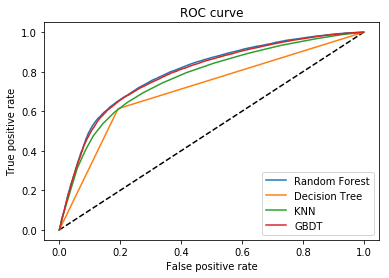

In [84]:
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_rf, tpr_rf, label='Random Forest')
plt.plot(fpr_dt, tpr_dt, label='Decision Tree')
plt.plot(fpr_knn, tpr_knn, label='KNN')
plt.plot(fpr_gbdt, tpr_gbdt, label='GBDT')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='lower right')
plt.savefig("roc.png")

In [94]:
gbr = GradientBoostingClassifier(learning_rate= 0.01,
                                 max_depth= 100,
                                 max_features= 'sqrt',
                                 min_samples_leaf= 6,
                                 min_samples_split= 15,
                                 n_estimators= 100)

In [95]:
%%timeit
gbr.fit(X_train, y_train)

14.2 s ± 438 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


# McNemar's Test

In [96]:
from mlxtend.evaluate import mcnemar_table
rf_pred = best_rf.predict(X_test)
gbr_pred = gbr.predict(X_test)

In [99]:
tb = mcnemar_table(y_target=y_test, 
                   y_model1=rf_pred, 
                   y_model2=gbr_pred)
print(tb)

[[33775  1140]
 [ 1227 11776]]


In [100]:
from mlxtend.evaluate import mcnemar

chi2, p = mcnemar(ary=tb, corrected=True)
print('chi-squared:', chi2)
print('p-value:', p)

chi-squared: 3.12463033376
p-value: 0.0771173606519


In [101]:
evaluate(gbr, X_test, y_test)

Model Performance
Accuracy 0.73


0.72999999999999998

In [102]:
evaluate(knn_gs.best_estimator_, X_test, y_test) 

Model Performance
Accuracy 0.71


0.70999999999999996

In [103]:
evaluate(dt_random.best_estimator_, X_test, y_test)

Model Performance
Accuracy 0.71


0.70999999999999996

In [104]:
evaluate(best_rf, X_test, y_test)

Model Performance
Accuracy 0.73


0.72999999999999998

In [105]:
%timeit KNeighborsClassifier(n_neighbors=18).fit(X_train, y_train)

32.2 ms ± 467 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
